## Scikit Learn Model Evaluation Using Train & Test Split

In [1]:
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [2]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [3]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape,"\n")

# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4) 

(90,)
(60,)


In [4]:
# STEP 2: train the model on the training set
# import the class
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [5]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


## Using KNN = 5

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


## Using KNN = 1

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


## Locating a better value for K?

In [8]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

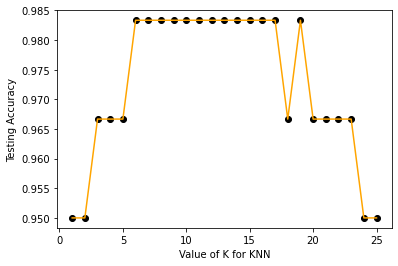

In [9]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# plot the relationship between K and testing accuracy
plt.scatter(k_range, scores, color='black')
plt.plot(k_range, scores, color='orange')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')